In [1]:
#define all relevant functions
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [2]:
def read_data(file_name):
    """Reads and processes data from a given file, correctly handling filenames with 'ffX'."""
    data = []
    
    with open(file_name, 'r') as f:
        for line in f:
            l = line.split()
            
            if len(l) != 4:
                continue  # Skip lines that do not match expected format
            
            try:
                # Extract the filename and split into parts
                file_parts = l[0].split("/")[-1].split("_")

                # Remove any "ffX" component
                file_parts = [part for part in file_parts if not (part.startswith("ff") and part[2:].isdigit())]

                # Extract only the LAST 4 elements (since the earlier ones are not needed)
                U = float(file_parts[-4])   # Extracts U parameter
                J = float(file_parts[-3])   # Extracts J parameter
                nk = int(file_parts[-2])    # Extracts nk number points
                nkf = int(file_parts[-1].split(".")[0])  # Extracts nkf number points

                Tc = l[1]  # Tc value
                phase = float(l[2])  # Dominant phase
                
                # Extract time in seconds
                time_parts = l[3].split("m")
                seconds = float(time_parts[0]) * 60 + float(time_parts[1].split("s")[0])
                
                # Store data as a LIST (not dictionary)
                final_data = [U, J, nk, nkf, Tc, phase, seconds]
                data.append(final_data)
            
            except (ValueError, IndexError) as e:
                print(f"Skipping line due to error: {line.strip()} - {e}")
    
    return data



In [3]:
def plot_Tc(data, U):

    #specify U for which th Tc is plotted 
    data = read_data(data)

    groundstate = []
    Us = []
    mu = []
    points = []
    tc = []
    nk =[]
    nkf = []
    times = []
    for d in data:
        if d[0] == U:

            Us.append(d[0])
            mu.append(d[1])
            points.append([d[2],d[3]])  #nk, nkf vector
            groundstate.append(d[4])  #Stores GS
            nk.append(d[2])
            nkf.append(d[3])
            tc.append(d[5])  #stores Tc
            times.append(d[6])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.grid()

    color_map = {
        "SC": "#A7C7E7",
        "CDW": "#FFB347",
        "FL": "black",
        "SDW": "#B0E57C"
    }

    labels_added = {}

    for i in range(len(Us)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used
        ax.scatter(mu[i], tc[i], c=colour, s=120, marker="o", label=label)
    
    ax.plot(mu, tc, ls ='--', color = 'grey')
   # ax.axvline(-3.85, ls ='--', color = 'black')
    #ax.axvline(-2.15, ls ='--', color = 'black')
    #ax.axvline(-1.85, ls ='--', color = 'black')
    #ax.axvline(3.85, ls ='--', color = 'black')
    #ax.axvline(2.15, ls ='--', color = 'black')
    #ax.axvline(1.85, ls ='--', color = 'black')
    #ax.axvline(-1.35, ls ='--', color = 'black')
    #ax.axvline(1.35, ls ='--', color = 'black')
    #ax.axvline(-0.65, ls ='--', color = 'black')
    #ax.axvline(0.65, ls ='--', color = 'black')
    ax.tick_params('both', labelsize = 20)
    ax.legend(fontsize =20)
    ax.set_xlabel(r"J(eV)", fontsize = 20)
    ax.set_ylabel("Tc(eV)", fontsize =20)

    #ax.set_title(f"1NN model: Tc as a function of doping ($\mu$) for U= {U}")

In [4]:
def plot_Tc_mu(data, mus):

    #specify U for which th Tc is plotted 
    data = read_data(data)

    groundstate = []
    Us = []
    mu = []
    points = []
    tc = []
    nk =[]
    nkf = []
    times = []
    for d in data: 
        if d[1] == mus:
            

            Us.append(d[0])
            mu.append(d[1])
            points.append([d[2],d[3]])  #nk, nkf vector
            groundstate.append(d[4])  #Stores GS
            nk.append(d[2])
            nkf.append(d[3])
            tc.append(d[5])  #stores Tcplot_Tc("1NNN_0p75_20_5_ff4_PhaseDiagram.log", 3)
            times.append(d[6])
    
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.grid()

   
    color_map = {
        "SC": "#A7C7E7",
        "CDW": "#FFB347",
        "FL": "black",
        "SDW": "#B0E57C"
    }

    labels_added = {}

    for i in range(len(Us)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used
        ax.scatter(Us[i], tc[i], c=colour, s=100, marker="o", label=label)
    Us = np.sort(Us)
    tc = np.sort(tc)
        
    ax.plot(Us, tc, color = "grey", ls='--' )

        
    ax.legend(fontsize =20)
    ax.set_xlabel("U(eV)", fontsize =30)
    ax.set_ylabel("Tc(eV)", fontsize =30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    #ax.set_title(f"Tc as a function of Coloumb repulsion U for  $\mu$ = {mus}", fontsize = 16)

In [5]:

import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors

def lighten_color(color, factor=0.5):
    """Lighten the given color by a specified factor (0 = same, 1 = white)."""
    rgb = np.array(mcolors.to_rgb(color))
    return mcolors.to_rgba(rgb + (1 - rgb) * factor, alpha=0.5) 



def plot_U_J_Voronoi(inputname,model):
    # print(inputname,outputname,"PYTHON",os.getcwd())
    data = read_data(inputname)
    # Triangular grid
    kb_ev = 8.6173303e-5 #eV
    x = []  #stores Us
    y = []  #stores Js
    groundstate = []
    points = []
    z = []
    for d in data:
        x.append(d[0])
        y.append(d[1])
        points.append([d[0],d[1]])  #U,J vector
        groundstate.append(d[4])  #Stores GS
        z.append((d[5])/kb_ev)  #stores Tc


    #convert ground_State to numbers
    groundstate_num = []
    for i in range(len(groundstate)):
        if groundstate[i] == "FL":
            groundstate_num.append(0)
        elif groundstate[i] == "SC":
            groundstate_num.append(1)
        elif groundstate[i] == "SDW":
            groundstate_num.append(2)
        elif groundstate[i] == "CDW":
            groundstate_num.append(3)
        else:
            groundstate_num.append(-1)


    color_map = {
    "SC": 'blue',
    "CDW": 'orange',
    "FL": "black",
    "SDW": "green",
    "Empty": "white"
    }

    max_U = max(x)
    min_U = min(x)
    max_J = max(y)
    min_J = min(y)

# Add in boundaries
    for i in np.linspace(min_U, max_U, 201):
        points.append([i, min_J - 1])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_J, max_J, 201):
        points.append([min_U - 1, i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_U, max_U, 201):
        points.append([i, max_J + 1])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    for i in np.linspace(min_J, max_J, 201):
        points.append([max_U + 1, i])
        groundstate.append("Empty")
        groundstate_num.append(-1)

    points = np.array(points)
    categories = np.array(groundstate_num)

# Compute Voronoi diagram
    vor = Voronoi(points)

    fig, ax = plt.subplots(figsize=(8, 6))

# Plot points with category colors
    for i in range(len(x)):
        colour = color_map.get(groundstate[i], "white")
        ax.scatter(x[i], y[i], c=colour, s=20, marker="x")

# **Fill Voronoi regions with lighter colors**
    patches = []
    for i, region in enumerate(vor.regions):
        if not -1 in region and len(region) > 0:  # Ignore open regions
            polygon_vertices = [vor.vertices[j] for j in region]

        # Find closest point to this region
            region_center = np.mean(polygon_vertices, axis=0)
            closest_idx = np.argmin(np.linalg.norm(points - region_center, axis=1))
            region_type = groundstate[closest_idx]  # Assign color based on closest classified point

            color = color_map.get(region_type, "white")  # Get marker color
            lighter_color = lighten_color(color, factor=0.6)  # Make it lighter

            polygon = Polygon(polygon_vertices, closed=True, edgecolor='none', facecolor=lighter_color)
            patches.append(polygon)

# Add filled regions to the plot
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)

# Plot Voronoi edges (black)
    #for ridge in vor.ridge_vertices:
     #   if -1 not in ridge:  # Ignore infinite lines
      #      ridge_points = vor.vertices[ridge]
       #     ax.plot(ridge_points[:, 0], ridge_points[:, 1], 'black', linewidth=1)

    legend_patches = [mpatches.Patch(color=color, label=phase) for phase, color in color_map.items() if phase != "Empty"]

# Add the legend to the plot
    ax.legend(handles=legend_patches, title=" Phase", loc="upper right", fontsize=10)

    ax.set_xlabel("U (eV)")
    ax.set_ylabel(r"J (eV)")
    ax.set_title(f"{model}")
    ax.set_ylim(0, 1.05)
    ax.grid()
    plt.savefig(f"{model}.png") 

    plt.show()

    

    







In [6]:
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors

def plot_U_J_Tc(inputname, model):
    data = read_data(inputname)
    kb_ev = 8.6173303e-5  # eV
    
    x, y, points, z = [], [], [], []
    for d in data:
        x.append(d[0])
        y.append(d[1])
        points.append([d[0], d[1]])  # U, J vector
        z.append((d[5]))  # Stores Tc
    
    max_U, min_U = max(x), min(x)
    max_J, min_J = max(y), min(y)

    # Add boundary points
    for i in np.linspace(min_U, max_U, 201):
        points.append([i, min_J - 1])
    for i in np.linspace(min_J, max_J, 201):
        points.append([min_U - 1, i])
    for i in np.linspace(min_U, max_U, 201):
        points.append([i, max_J + 1])
    for i in np.linspace(min_J, max_J, 201):
        points.append([max_U + 1, i])

    points = np.array(points)
    z = np.array(z)
    
    # Compute Voronoi diagram
    vor = Voronoi(points)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Scatter plot with colormap based on Tc magnitude
    scatter = ax.scatter(x, y, c=z, cmap='plasma', s=50, marker="x", edgecolors='k')
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Tc Magnitude (eV)")
    
    
    
    ax.set_xlabel("U (eV)")
    ax.set_ylabel("J (eV)")
    ax.set_title(f"{model}")
    ax.set_ylim(0,1.05)
    ax.grid()
    #plt.savefig(f"{model}.png")
    plt.show()

/tmp/ipykernel_3736/1824042820.py:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(x, y, c=z, cmap='plasma', s=50, marker="x", edgecolors='k')


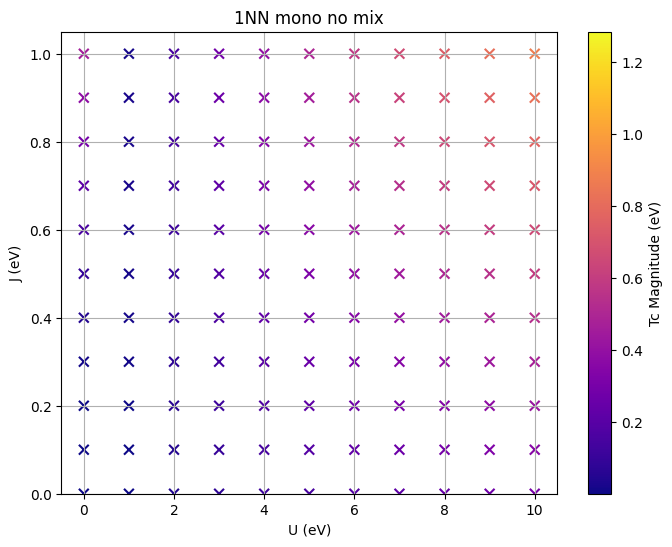

In [7]:
plot_U_J_Tc("1NNMono2orbsnomix.log","1NN mono no mix")


/tmp/ipykernel_3736/1824042820.py:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(x, y, c=z, cmap='plasma', s=50, marker="x", edgecolors='k')


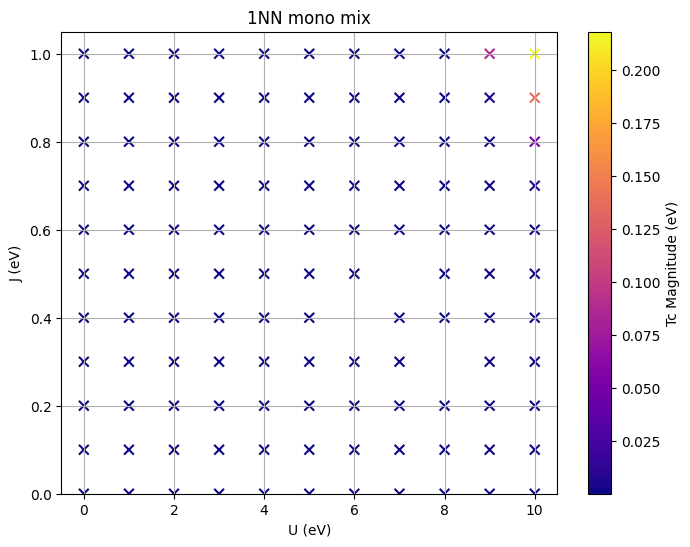

In [8]:
plot_U_J_Tc("1NNMono2orbsmix.log","1NN mono mix")

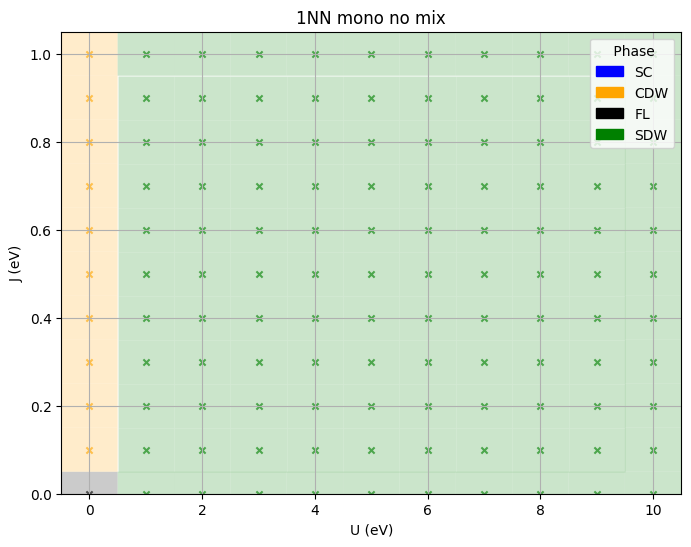

In [9]:
plot_U_J_Voronoi("1NNMono2orbsnomix.log","1NN mono no mix")


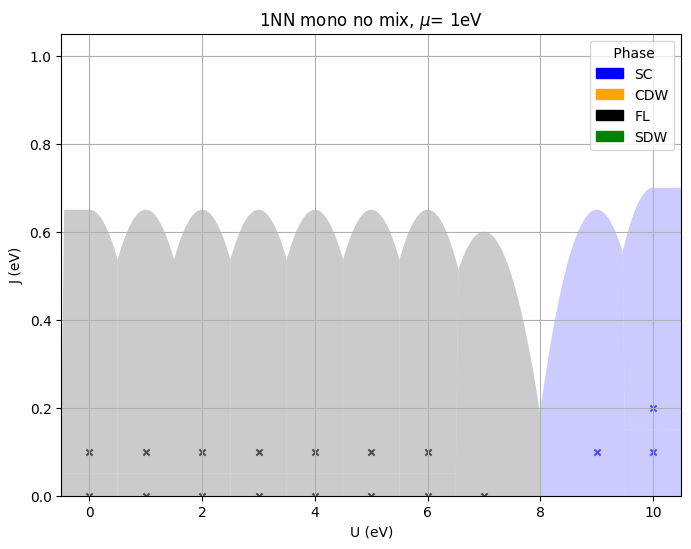

In [10]:
plot_U_J_Voronoi("1NNMono2orbsnomixmu1.log",r"1NN mono no mix, $\mu$= 1eV")

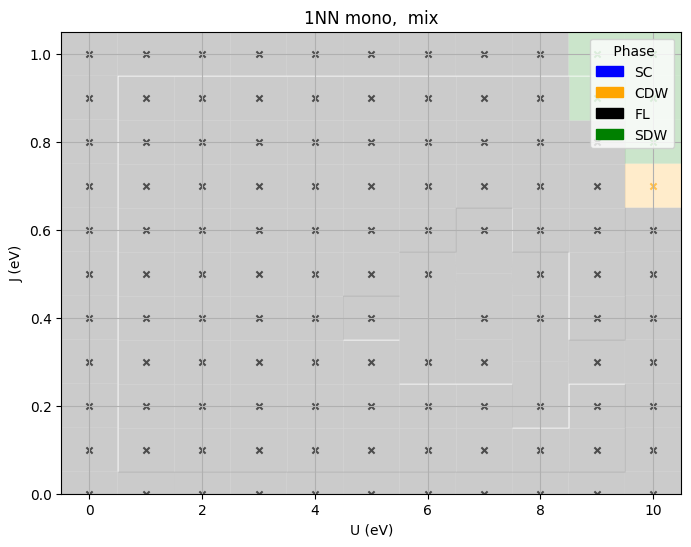

In [11]:
plot_U_J_Voronoi("1NNMono2orbsmix.log","1NN mono,  mix")

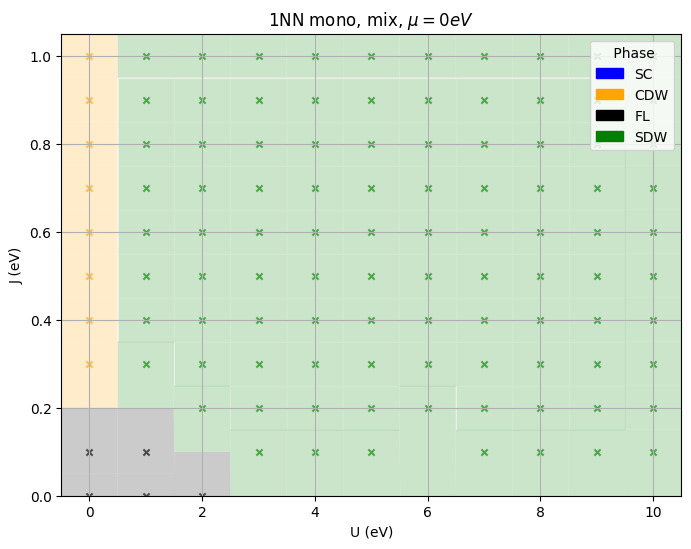

In [12]:
plot_U_J_Voronoi("MonoMix.log","1NN mono, mix, $\mu =0eV$")

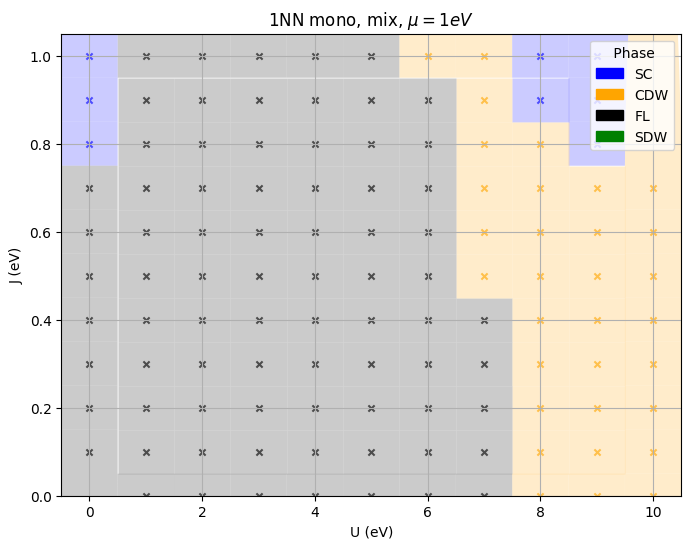

In [38]:
plot_U_J_Voronoi("MonoMixMu1.log","1NN mono, mix, $\mu =1eV$")

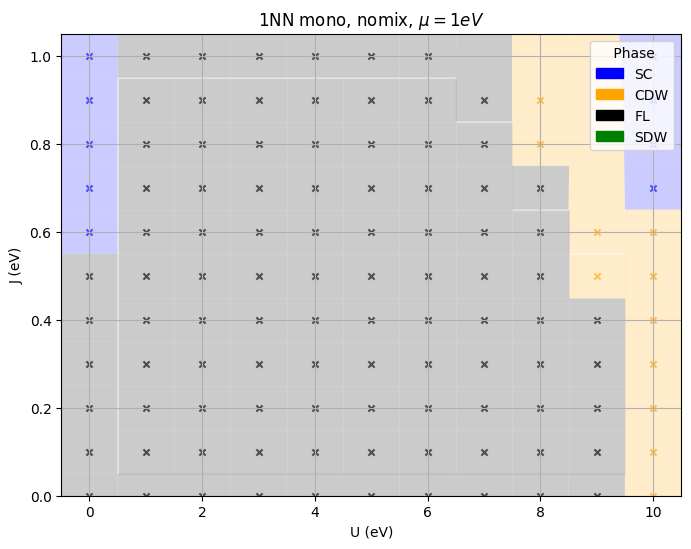

In [37]:
plot_U_J_Voronoi("MonoNoMixMu1.log","1NN mono, nomix, $\mu =1eV$")


/tmp/ipykernel_3736/1824042820.py:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = ax.scatter(x, y, c=z, cmap='plasma', s=50, marker="x", edgecolors='k')


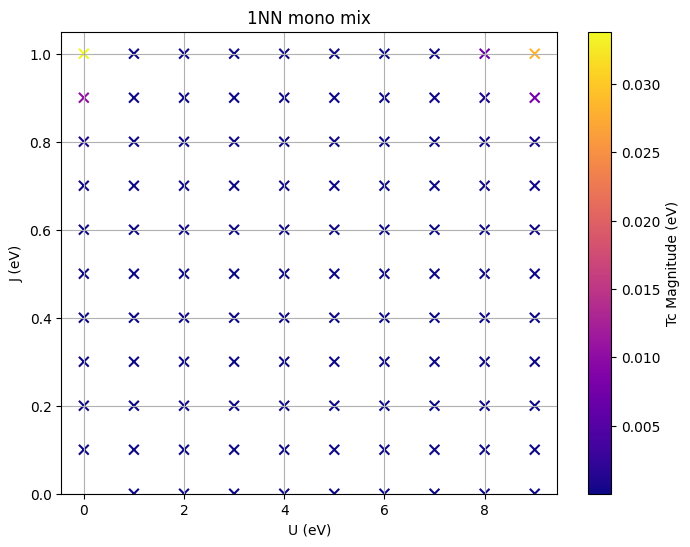

In [20]:
plot_U_J_Tc("MonoMixMu1.log","1NN mono mix")

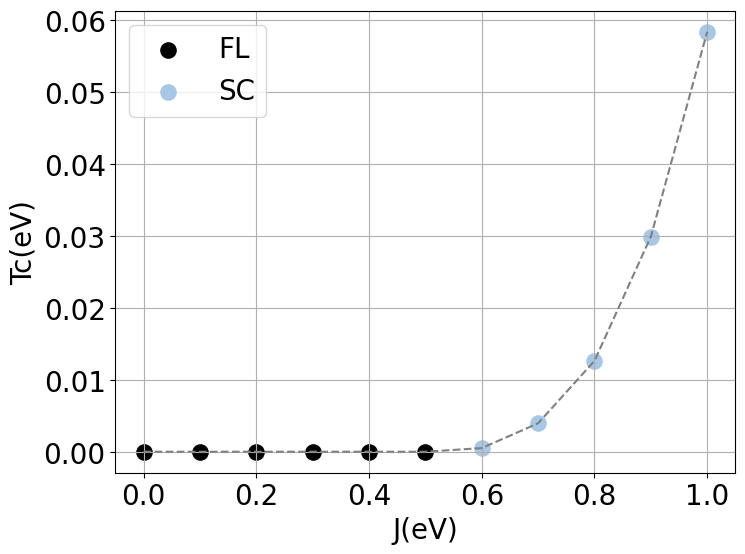

In [16]:
plot_Tc("MonoNoMixMu1.log", 0)

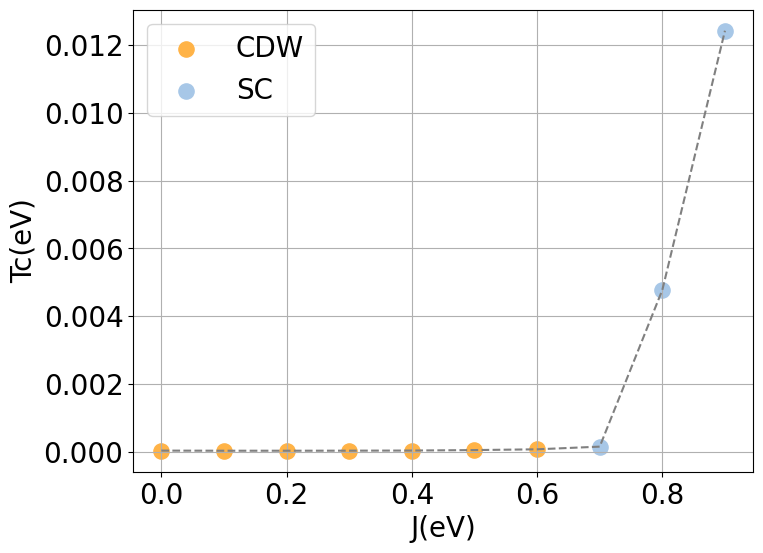

In [31]:
plot_Tc("MonoNoMixMu1.log", 10)

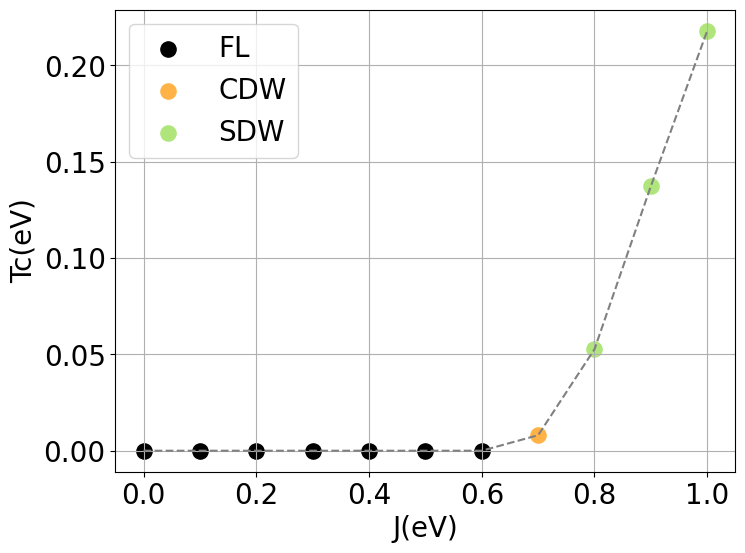

In [17]:
plot_Tc("1NNMono2orbsmix.log", 10)

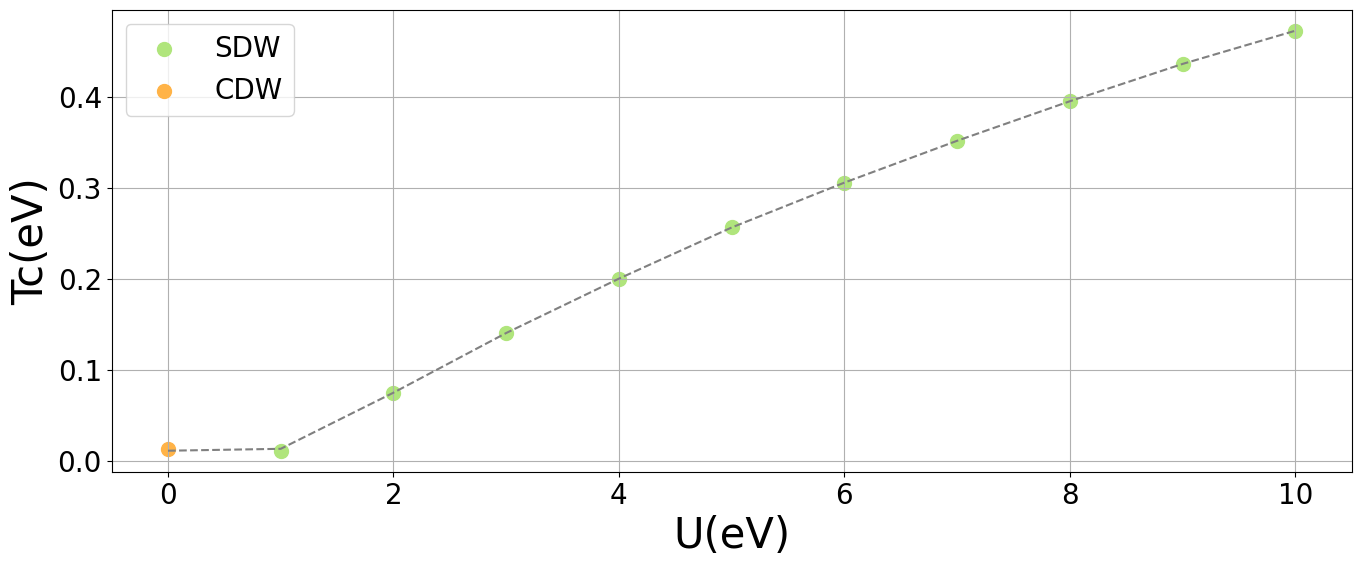

In [18]:
plot_Tc_mu("1NNMono2orbsnomix.log", 0.3)